In [13]:
import os
import rasterio
import numpy as np
from matplotlib import pyplot as plt

def calculate_ndwi(caminho_b3, caminho_b5):
    with rasterio.open(caminho_b3) as src_b3, rasterio.open(caminho_b5) as src_b5:
        # Ler os dados das bandas como matrizes numpy
        b3 = src_b3.read(1).astype(float)
        b5 = src_b5.read(1).astype(float)

        # Calcular e imprimir o maior e o menor valor em b3
        print(f'Max value in b3: {np.max(b3)}')
        if np.min(b3)==0:
            # Encontrar o menor valor em b3 maior que zero
            min_positive_b3 = np.min(b3[(b3 > 0)])
            # Exibir o menor valor presente em b3 maior que zero
            print(f'Min value in b3: {min_positive_b3}')
        else:
            print(f'Min value in b3: {np.min(b3)}')
        print(f'Max value in b5: {np.max(b5)}')
        if np.min(b5)==0:
            # Encontrar o menor valor em b5 maior que zero
            min_positive_b5 = np.min(b5[(b5 > 0)])
            # Exibir o menor valor presente em b5 maior que zero
            print(f'Min value in b5: {min_positive_b5}')
        else:
            print(f'Min value in b5: {np.min(b5)}')

        # Mostrar o número de elementos em b3
        print(f'Number of elements in b3: {np.size(b3)}')
        # Mostrar o número de elementos em b5
        print(f'Number of elements in b5: {np.size(b5)}')

        # Contar o número de elementos com valor 0 em b3
        num_zeros_b3 = np.count_nonzero(b3 == 0)
        print(f'Number of elements with value 0 in b3: {num_zeros_b3}')
        # Contar o número de elementos com valor 0 em b5
        num_zeros_b5 = np.count_nonzero(b5 == 0)
        print(f'Number of elements with value 0 in b5: {num_zeros_b5}')

        # Máscara para considerar apenas valores diferentes de zero em b3 e b5
        mask_nonzero = (b3 != 0) & (b5 != 0)

        # Calcular NDWI apenas para os valores não nulos em b3 e b5
        ndwi = np.zeros_like(b3, dtype=float)
        ndwi[mask_nonzero] = (b3[mask_nonzero] - b5[mask_nonzero]) / (b3[mask_nonzero] + b5[mask_nonzero])

        # Exibir o NDWI resultante
        print(f'Max value in ndwi: {np.max(ndwi)}')
        # Encontrar o menor valor em ndwi maior que zero
        min_positive_ndwi = np.min(ndwi[(ndwi > 0)])
        # Exibir o menor valor presente em ndwi maior que zero
        print(f'Min value in ndwi: {min_positive_ndwi}')

        # Exibir o NDWI
        plt.imshow(ndwi, cmap='RdYlBu', vmin=-1, vmax=1)
        plt.colorbar(label='NDWI')
        plt.title('Índice de Água Normalizado (NDWI)')
        plt.show()

Max value in b3: 11485.0
Min value in b3: 8552.0
Max value in b5: 7709.0
Min value in b5: 5815.0
Number of elements in b3: 9595
Number of elements in b5: 9595
Number of elements with value 0 in b3: 205
Number of elements with value 0 in b5: 205
Max value in ndwi: 0.2809844711397597
Min value in ndwi: 0.10713458420199212


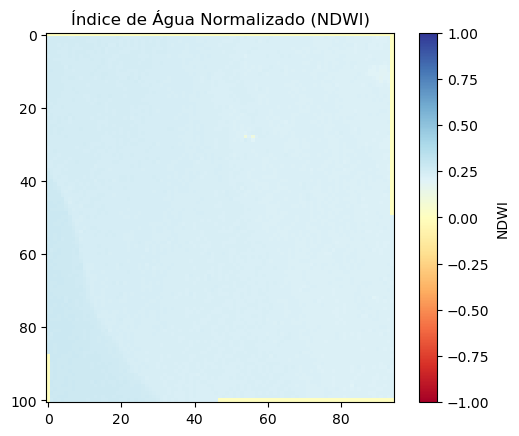

In [14]:
# Exemplo de uso da função
caminho_b3 = '/home/barcelos/Desktop/LL14/LL14CUTB3/LC08_L1TP_215074_20141229_20200910_02_T1_B3_CUT.tif'
caminho_b5 = '/home/barcelos/Desktop/LL14/LL14CUTB5/LC08_L1TP_215074_20141229_20200910_02_T1_B5_CUT.tif'
calculate_ndwi(caminho_b3, caminho_b5)